In [1]:
import janitor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
diabetes = pd.read_csv('diabetes.csv').clean_names()

In [3]:
diabetes.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies                 768 non-null int64
glucose                     768 non-null int64
bloodpressure               768 non-null int64
skinthickness               768 non-null int64
insulin                     768 non-null int64
bmi                         768 non-null float64
diabetespedigreefunction    768 non-null float64
age                         768 non-null int64
outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


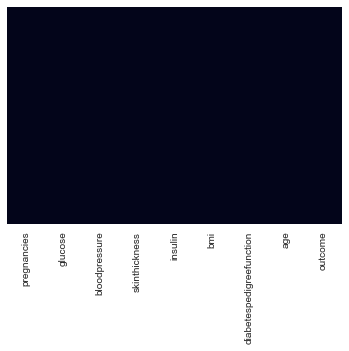

In [5]:
sns.set_style('whitegrid')
sns.heatmap(diabetes.isnull(), yticklabels=False, cbar=False)

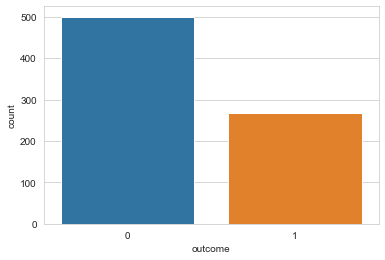

In [6]:
sns.countplot(diabetes['outcome'])

In [7]:
diabetes['outcome'].value_counts()

0    500
1    268
Name: outcome, dtype: int64

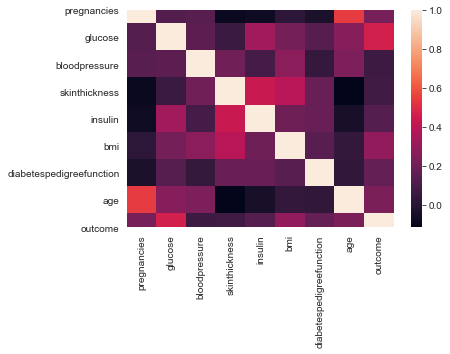

In [8]:
sns.heatmap(diabetes.corr())

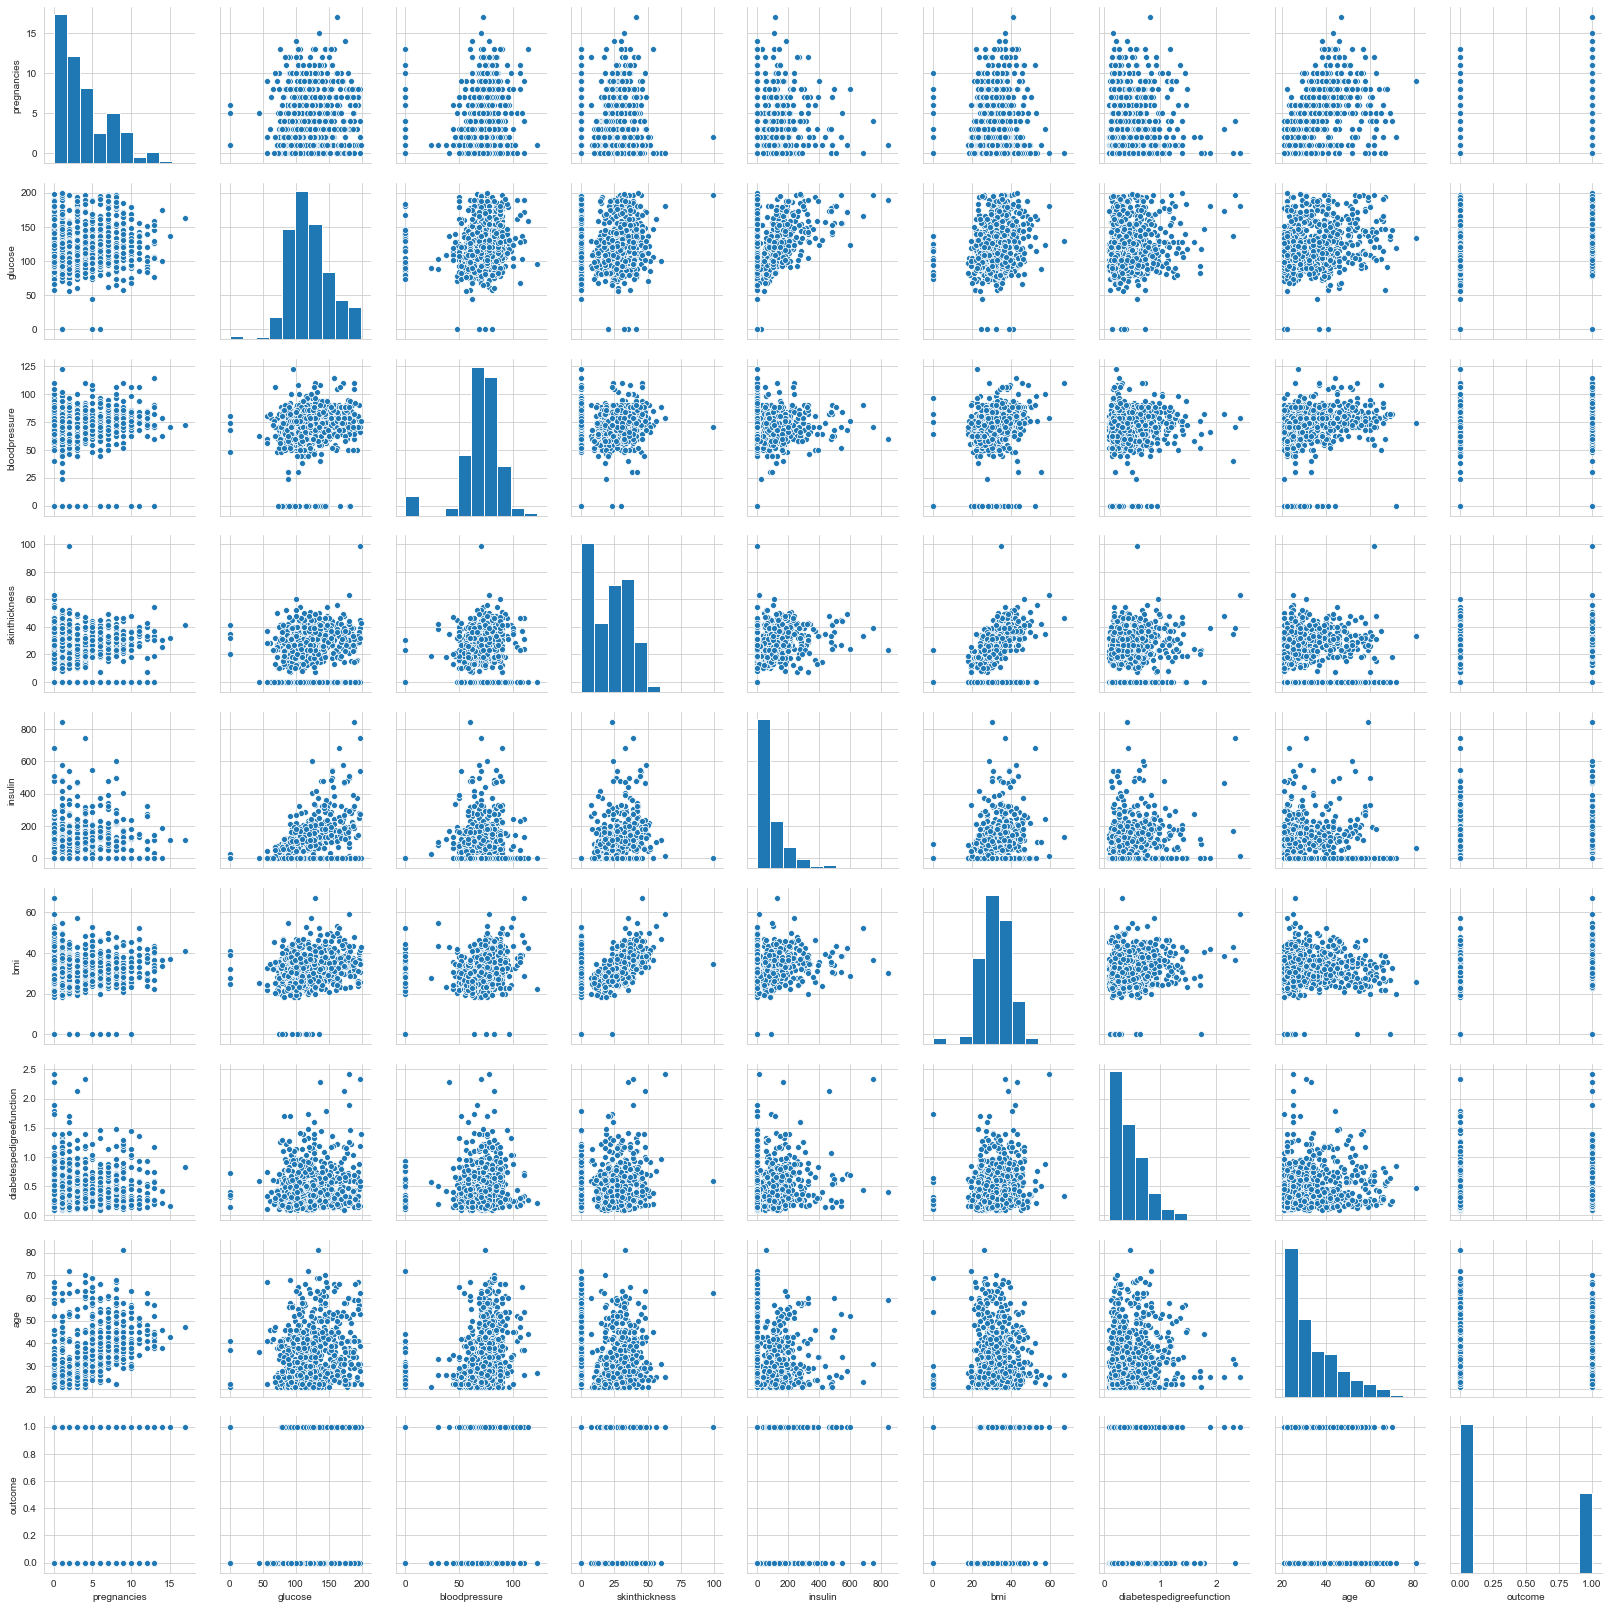

In [9]:
sns.pairplot(diabetes)

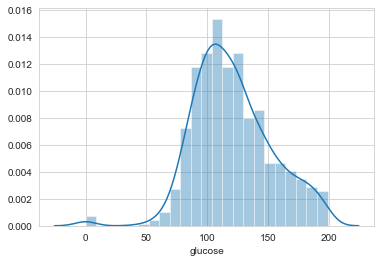

In [10]:
sns.distplot(diabetes['glucose'])

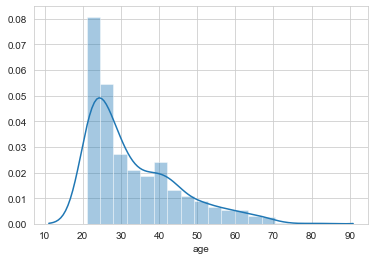

In [11]:
sns.distplot(diabetes['age'])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.drop('outcome', axis=1), diabetes['outcome'],
                                                   test_size=0.3, random_state=45, stratify=diabetes['outcome'])

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

In [15]:
logmodel = LogisticRegression()

In [16]:
logmodel.fit(X_train, y_train)

C:\Users\cyro_\Anaconda3Novo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
logmodel.score(X_train, y_train)

0.7783985102420856

In [18]:
logmodel.coef_

array([[ 0.09637435,  0.02424572, -0.01731633,  0.00102601, -0.00080063,
         0.05042013,  0.75061159,  0.0124262 ]])

In [19]:
y_pred = logmodel.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       150
           1       0.73      0.54      0.62        81

   micro avg       0.77      0.77      0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



In [21]:
print(confusion_matrix(y_test, y_pred))

[[134  16]
 [ 37  44]]
